## Exercise 6: Chi-Square Test

**Problem Description:**  
Test independence between non-negative features and categorical target using chi-square statistic.

**Solution Overview:**  
Scale to [0,1], apply `SelectKBest(chi2)`, vary _k_, and plot.



In [1]:
# 6.1 Setup
!pip install scikit-learn pandas matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 6.2 Load Data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
print("Original features:", list(X.columns))

Original features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# 6.3 Scale features to
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [4]:
# 6.4 Compute chi-sq scores for k=2
selector = SelectKBest(score_func=chi2, k=2)
selector.fit(X_scaled, y)
df_chi2 = pd.DataFrame({
'feature': X.columns,
'chi2_score': selector.scores_
}).sort_values('chi2_score', ascending=False)
print("Chi-Square scores:\n", df_chi2)
print("Top 2 features:", list(df_chi2['feature'][:2]))

Chi-Square scores:
              feature  chi2_score
3   petal width (cm)   30.478068
2  petal length (cm)   26.861936
0  sepal length (cm)   11.377274
1   sepal width (cm)    4.470734
Top 2 features: ['petal width (cm)', 'petal length (cm)']


Top 1 features: ['petal width (cm)']


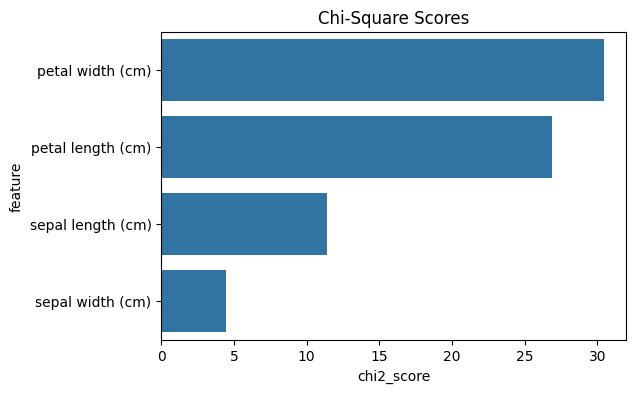

In [6]:
# 6.5 Vary k=1,2,3 and plot
for k in range(1,2):
    s = SelectKBest(score_func=chi2, k=k).fit(X_scaled, y)
    print(f"Top {k} features:", list(X.columns[s.get_support()]))

plt.figure(figsize=(6,4))
sns.barplot(x='chi2_score', y='feature', data=df_chi2)
plt.title('Chi-Square Scores')
plt.show()

# Analysis
- Why must features be non-negative for chi-square?

- Vary k from 1 to 3; how stable are selections?

- Plot chi-square scores in a bar chart.

# Exercise 6: Chi-Square Test
## Analysis to Include in Code

In [7]:
# 6.6 Analysis 1: k-sensitivity – See how feature selection changes with k
print("=== Top-k Feature Selection Stability (k=1 to 4) ===")
stability = {}
for k in range(1, 5):
    selector = SelectKBest(score_func=chi2, k=k).fit(X_scaled, y)
    top_features = list(X.columns[selector.get_support()])
    stability[k] = top_features
    print(f"Top {k} features:", top_features)


=== Top-k Feature Selection Stability (k=1 to 4) ===
Top 1 features: ['petal width (cm)']
Top 2 features: ['petal length (cm)', 'petal width (cm)']
Top 3 features: ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']
Top 4 features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


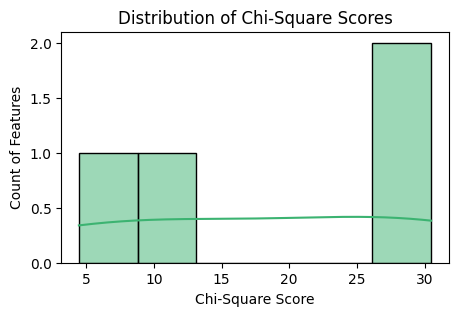

In [8]:
# 6.7 Analysis 2: Distribution of chi-square scores
plt.figure(figsize=(5,3))
sns.histplot(df_chi2['chi2_score'], bins=6, kde=True, color='mediumseagreen')
plt.title('Distribution of Chi-Square Scores')
plt.xlabel('Chi-Square Score')
plt.ylabel('Count of Features')
plt.show()


/tmp/ipython-input-9-3918759260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X_scaled[feat], palette='mako')


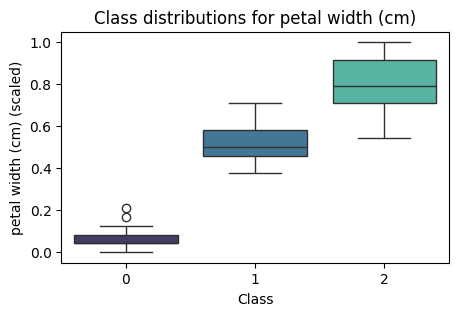

/tmp/ipython-input-9-3918759260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X_scaled[feat], palette='mako')


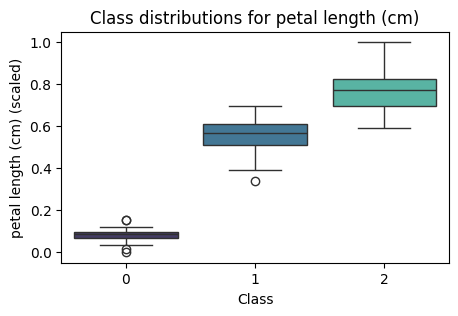

In [9]:
# 6.8 Analysis 3: Visualize class distributions for top Chi-Square features
top_features = df_chi2['feature'].head(2).tolist()
for feat in top_features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=y, y=X_scaled[feat], palette='mako')
    plt.title(f"Class distributions for {feat}")
    plt.xlabel('Class')
    plt.ylabel(f"{feat} (scaled)")
    plt.show()


In [10]:
# 6.9 Analysis 4: Cross-tabulation of feature bins vs class (chi-square logic)
# Bin the continuous scaled feature for cross-tab
for feat in top_features:
    binned = pd.cut(X_scaled[feat], bins=4, labels=[1,2,3,4])
    ct = pd.crosstab(binned, y, normalize='index')
    print(f"\nCrosstab of {feat} bins vs. class:\n", ct)



Crosstab of petal width (cm) bins vs. class:
 target              0      1      2
petal width (cm)                   
1                 1.0  0.000  0.000
2                 0.0  1.000  0.000
3                 0.0  0.625  0.375
4                 0.0  0.000  1.000

Crosstab of petal length (cm) bins vs. class:
 target               0         1         2
petal length (cm)                         
1                  1.0  0.000000  0.000000
2                  0.0  1.000000  0.000000
3                  0.0  0.639344  0.360656
4                  0.0  0.000000  1.000000


In [11]:
# 6.10 Analysis 5: Compare chi-square scores to other methods (e.g., MI)
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y, random_state=42)
df_mi = pd.DataFrame({
    'feature': X.columns,
    'MI_score': mi_scores
}).sort_values('MI_score', ascending=False)
df_compare = df_chi2.merge(df_mi, on='feature')
print("\nChi-Square vs. MI Scores:\n", df_compare)
corr_coef = df_compare['chi2_score'].corr(df_compare['MI_score'])
print(f"Correlation between chi-square and MI: {corr_coef:.3f}")



Chi-Square vs. MI Scores:
              feature  chi2_score  MI_score
0   petal width (cm)   30.478068  0.985643
1  petal length (cm)   26.861936  0.992573
2  sepal length (cm)   11.377274  0.511365
3   sepal width (cm)    4.470734  0.299424
Correlation between chi-square and MI: 0.992
